In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.63      0.73      0.68      4072
           1       0.17      0.37      0.23        62
           2       0.51      0.75      0.61      1839
           3       0.88      0.05      0.09      1700

    accuracy                           0.58      7673
   macro avg       0.55      0.47      0.40      7673
weighted avg       0.65      0.58      0.53      7673



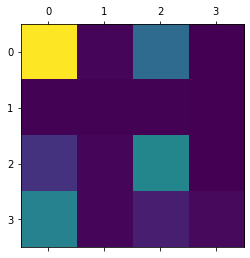

In [2]:
test_classifications = pd.read_table("../results/multitask/C/64-128-128-256/classifications.tsv")
cath_annotation_frame = pd.read_table("../data/domain-classifications.tsv")
print(classification_report(y_true=te
                            st_classifications.actual, y_pred=test_classifications.prediction))
plt.matshow(confusion_matrix(test_classifications.actual, test_classifications.prediction))

In [4]:
embedding_loc = Path('../databases/multitask/C/64-128-128-256/')

all_embeddings = sorted(embedding_loc.glob("*.npz"))
N = len(all_embeddings)
d = np.load(all_embeddings[0])['embedding'].shape[0]

dom2emb_idx = {p.stem:i for i, p in enumerate(all_embeddings)}

print("Loading embeddings")
emat = np.zeros((N, d))
for i, pth in enumerate(all_embeddings):
    emat[i] = np.load(pth)['embedding']
print("Running TSNE dimensionality reduction")
reduced = TSNE(n_components=2).fit_transform(emat)
print("Done")

Loading embeddings
Running TSNE dimensionality reduction
Done


In [5]:
cath_annotation_frame = cath_annotation_frame[cath_annotation_frame.DOMAIN.isin(dom2emb_idx)].copy()
cath_annotation_frame['tsne1'], cath_annotation_frame['tsne2'] = zip(*reduced)

In [21]:
level = 'CLASS'
K     = 4

In [22]:
unique_instances = cath_annotation_frame[level].unique()
map_             = dict(map(list, map(reversed, enumerate(unique_instances))))
cath_annotation_frame['class'] = cath_annotation_frame[level].apply(map_.get)

sizes = cath_annotation_frame['class'].value_counts().sort_values(ascending=False)
topK  = sizes.index[:K]

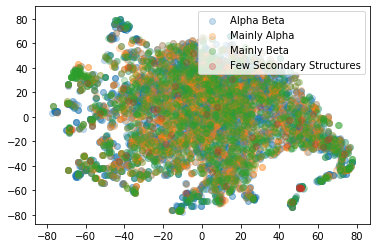

In [24]:
subframe = cath_annotation_frame[cath_annotation_frame['class'].isin(topK)]
for top in topK:
    subframe = cath_annotation_frame[cath_annotation_frame['class'] == top]
    plt.scatter(subframe.tsne1.values, subframe.tsne2.values, label=subframe[level].values[0], alpha=0.25)
    #plt.scatter(subframe[subframe['class'] == top])
#plt.scatter(subframe.tsne1.values, subframe.tsne2.values)
plt.legend()

In [27]:
cath_annotation_frame.ARCH.unique().size

39